Importing Libraries which will be required for data reading,cleaning and exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing customer demographics file and naming it cust_demo
cust_demo = pd.read_excel("CustomerDemographics.xlsx")

In [3]:
# Importing Customer Behaviour filr and naming it cust_behav
cust_behav = pd.read_excel("CustomerBehaviorData.xlsx")

In [4]:
# Importing Credit consumption data file and naming it credit_data
credit_data = pd.read_excel("CreditConsumptionData.xlsx")

In [5]:
pd.set_option('display.max_columns',200)

In [6]:
credit_data.shape

(20000, 2)

In [7]:
# Finding number of observations for which values of target variable are missings
credit_data['cc_cons'].isna().sum()

5000

- cc_cons will be our target variable and the data which is missing will be be predicted our model.Lets find out the number of observations for which data is missing
- We have 1500 observations for which values of target variable is available, after combining all three tables these observations will be taken for training the model and 5000 observations will be our testing sample
- Joining all three tables and dividing data into training set and testing set

In [8]:
data = cust_demo.merge(cust_behav,how='inner',on='ID').merge(credit_data,how='inner',on='ID')

In [9]:
data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [10]:
data.set_index('ID',inplace=True)

- Sepearting our dataset into two dataset, one in which value of target variable is known and second where target variable contain no value

In [11]:
data_1 = data[~data['cc_cons'].isna()]
data_0 = data[data['cc_cons'].isna()]

In [12]:
# Checking shape of both datatype
print('Shape of known data : ',data_1.shape )
print('Shape of unknown data : ',data_0.shape)

Shape of known data :  (15000, 48)
Shape of unknown data :  (5000, 48)


Checking for missing values and duplicates in data

In [13]:
data_1.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    1
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    2
investment_4  

In [14]:
data_1.duplicated().sum()

0

Ver few observations have missing values so these observations can be dropped

In [15]:
data_1.dropna(inplace=True)

In [16]:
data_1.shape

(14995, 48)

In [17]:
data_1.describe()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,1.499500e+04,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.0,14995.0,14995.0,14995.0,1.499500e+04,1.499500e+04,14995.000000,14995.000000,1.499500e+04,1.499500e+04,14995.000000,14995.000000,1.499500e+04,1.499500e+04,1.499500e+04,14995.000000,14995.000000,1.499500e+04,1.499500e+04,1.499500e+04,14995.000000,14995.000000,1.499500e+04,1.499500e+04,14995.000000
mean,47.793331,15.185028,5.510770,598.410804,0.719507,11.048616,17960.830861,8171.498747,1.633869e+04,7702.797188,12130.345532,7098.205684,41.492631,33.488296,41.496699,17.167256,13.982261,30.285562,277010.284295,1.0,1.0,1.0,1.0,6.196066e+05,2.333908e+05,44393.449143,3523.113863,6.822239e+04,8.079881e+04,36.398933,11.291964,5.439773e+04,6.554207e+04,8.356867e+04,11.923975,41.002734,5.719908e+04,7.614838e+04,7.850636e+04,19.948716,44.641080,5.257960e+04,1.576286e+04,55156.748249
std,30.636617,20.315682,2.865848,220.071350,0.449255,5.492216,25191.316571,14775.132716,2.706498e+04,18988.978011,18491.403327,13253.768400,97.447505,49.547493,47.347292,19.358883,17.089181,29.253645,179455.280195,0.0,0.0,0.0,0.0,3.088311e+06,4.073826e+05,87998.221265,7373.802022,1.126828e+05,1.989387e+05,30.703250,12.670499,1.951263e+05,1.016944e+05,1.776575e+05,16.845632,40.541599,2.000517e+05,1.545265e+05,1.482193e+05,27.202607,35.088317,1.282713e+05,1.179348e+05,97680.466478
min,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.590000,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.000000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,1.0,1.0,1.0,1.0,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.539814e+04,2.000000,11.000000,2.008300e+04,2.572692e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,6768.000000
50%,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3994.800000,8.694000e+03,3821.000000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,1.0,1.0,1.0,1.0,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191400e+04,3.822778e+04,4.814000e+04,4.000000,23.000000,3.140800e+04,4.580149e+04,4.590100e+04,7.000000,38.000000,3.042500e+04,3.953580e+03,13363.000000
75%,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21407.625000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.0,1.0,1.0,1.0,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.535808e+04,8.593500e+04,52.000000,19.000000,5.255900e+04,7.440055e+04,9.452768e+04,11.000000,69.000000,5.598600e+04,8.443858e+04

In [18]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 12554 to 4547
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  14995 non-null  object 
 1   gender                        14995 non-null  object 
 2   age                           14995 non-null  int64  
 3   Income                        14995 non-null  object 
 4   Emp_Tenure_Years              14995 non-null  float64
 5   Tenure_with_Bank              14995 non-null  int64  
 6   region_code                   14995 non-null  float64
 7   NetBanking_Flag               14995 non-null  int64  
 8   Avg_days_between_transaction  14995 non-null  float64
 9   cc_cons_apr                   14995 non-null  float64
 10  dc_cons_apr                   14995 non-null  float64
 11  cc_cons_may                   14995 non-null  float64
 12  dc_cons_may                   14995 non-null  float64
 13

#### Exploratory Data Analysis

Text(0.5, 1.0, 'Total number of different account type')

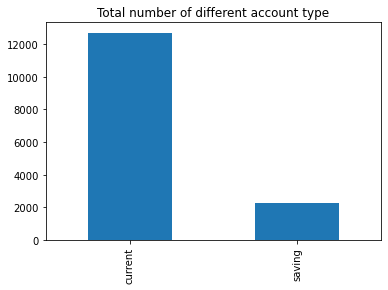

In [19]:
# Different number of account type
data_1['account_type'].value_counts().plot(kind='bar')
plt.title("Total number of different account type")

Text(0.5, 1.0, 'Number of customers on basis of gender')

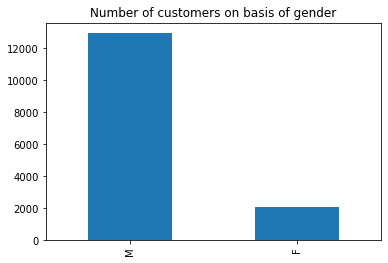

In [20]:
# customers on basis of gender
data_1['gender'].value_counts().plot(kind='bar')
plt.title("Number of customers on basis of gender")

Text(0.5, 1.0, 'Count of Different level of incomes')

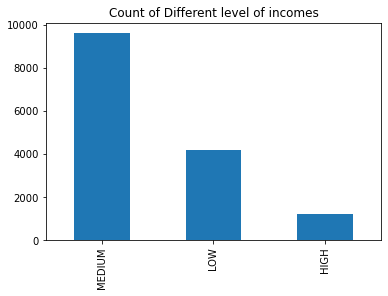

In [21]:
# Count of different income type
data_1['Income'].value_counts().plot(kind='bar')
plt.title("Count of Different level of incomes")

 Characterstics of customers in dataset are:
 - Most numbers are of Male,Medium Income level customers who are having current accounttype

In [22]:
# Total Credit and debit card,consumptions and total number of transactions in all three months
consumption = data_1[['cc_cons_apr','dc_cons_apr','cc_cons_may','dc_cons_may','cc_cons_jun','dc_cons_jun',]].agg(['sum','mean'],axis=0).T

In [23]:
consumption

,sum,mean
cc_cons_apr,2.693227e+08,17960.830861
dc_cons_apr,1.225316e+08,8171.498747
cc_cons_may,2.449986e+08,16338.688883
dc_cons_may,1.155034e+08,7702.797188
cc_cons_jun,1.818945e+08,12130.345532
dc_cons_jun,1.064376e+08,7098.205684


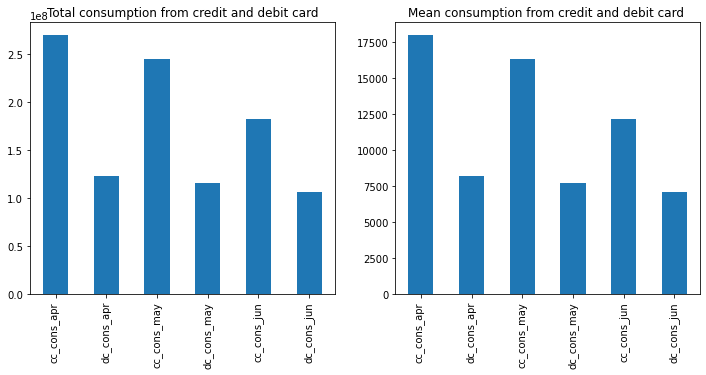

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
consumption['sum'].plot(kind='bar')
plt.title('Total consumption from credit and debit card')

plt.subplot(1,2,2)
consumption['mean'].plot(kind='bar')
plt.title('Mean consumption from credit and debit card ')

plt.show()

In [25]:
transactions = data_1[['cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun']].agg(['sum','mean'],axis=0).T

In [26]:
transactions

,sum,mean
cc_count_apr,622182.0,41.492631
cc_count_may,502157.0,33.488296
cc_count_jun,622243.0,41.496699
dc_count_apr,257423.0,17.167256
dc_count_may,209664.0,13.982261
dc_count_jun,454132.0,30.285562


Text(0.5, 1.0, 'Number of Mean transactions from credit and debit card ')

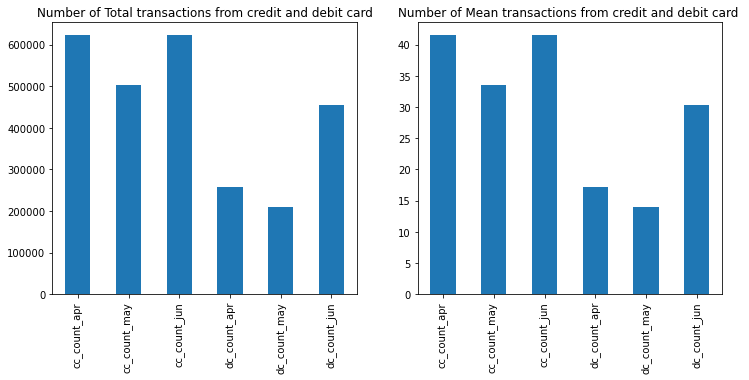

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
transactions['sum'].plot(kind='bar')
plt.title('Number of Total transactions from credit and debit card')

plt.subplot(1,2,2)
transactions['mean'].plot(kind='bar')
plt.title('Number of Mean transactions from credit and debit card ')

In [28]:
# Total and averages of amount credited and debited in all 3 months
amt = data_1[['debit_amount_apr','credit_amount_apr','debit_amount_may','credit_amount_may','debit_amount_jun','credit_amount_jun']].agg(['sum','mean'],axis=0).T

In [29]:
amt

,sum,mean
debit_amount_apr,1.022995e+09,68222.389109
credit_amount_apr,1.211578e+09,80798.808706
debit_amount_may,9.828034e+08,65542.073168
credit_amount_may,1.253112e+09,83568.670846
debit_amount_jun,1.141845e+09,76148.384844
credit_amount_jun,1.177203e+09,78506.361142


Text(0.5, 1.0, ' Mean of amount credit and debit')

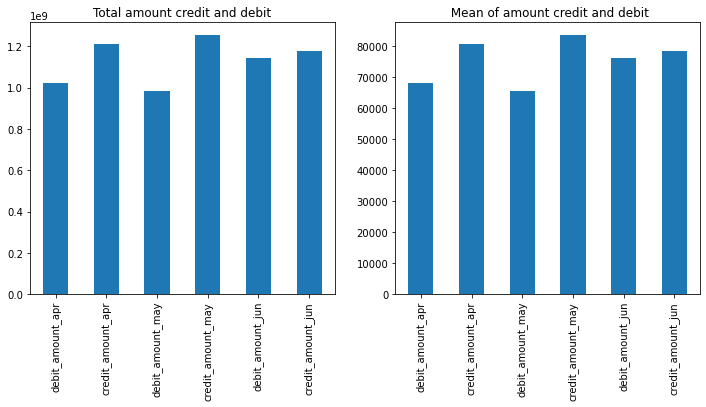

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
amt['sum'].plot(kind='bar')
plt.title('Total amount credit and debit')

plt.subplot(1,2,2)
amt['mean'].plot(kind='bar')
plt.title(' Mean of amount credit and debit')

- Credit card consumption is more than debit card
- Maximum amount of credit card consumption is done in month of April
- Debit card consumption does not have significant difference oin all 3 months
- Total number of transactions from credit card are more in all 3 months
- Amount credited to account is more than the amount debitted

In [31]:
# Sum and Mean of all investments
investments = data_1[['investment_1','investment_2','investment_3','investment_4']].agg(['sum','mean'],axis=0).T

In [32]:
investments

,sum,mean
investment_1,9.291002e+09,619606.649025
investment_2,3.499695e+09,233390.784792
investment_3,6.656798e+08,44393.449143
investment_4,5.282909e+07,3523.113863


Text(0.5, 1.0, ' Mean of investments')

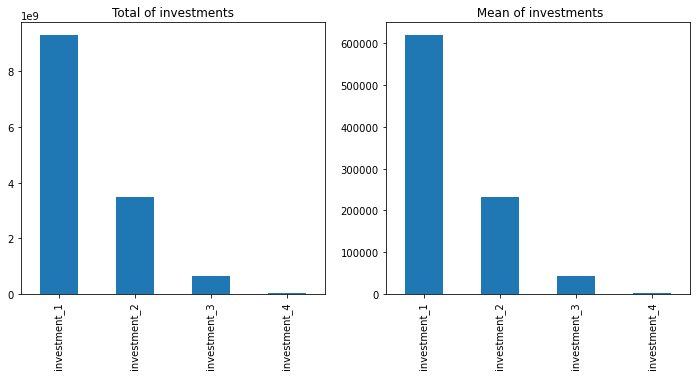

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
investments['sum'].plot(kind='bar')
plt.title('Total of investments')

plt.subplot(1,2,2)
investments['mean'].plot(kind='bar')
plt.title(' Mean of investments')

- Total amount of investment type 1 is way more than other three investment types

Text(0.5, 1.0, 'Customers of both genders with both account type')

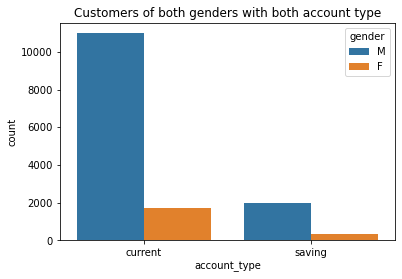

In [34]:
sns.countplot(data=data_1,x='account_type',hue='gender')
plt.title("Customers of both genders with both account type")

Text(0.5, 1.0, 'Customers with different income level and with different account type')

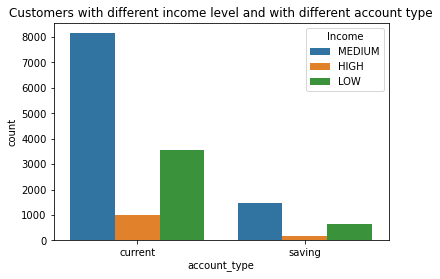

In [35]:
sns.countplot(data=data_1,x='account_type',hue='Income')
plt.title("Customers with different income level and with different account type")

Text(0, 0.5, 'Total Credit Card Spend')

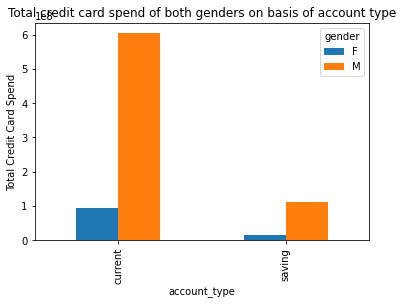

In [36]:
pd.pivot_table(data=data_1,index='account_type',columns='gender',values='cc_cons',aggfunc='sum').plot(kind='bar')
plt.title("Total credit card spend of both genders on basis of account type")
plt.ylabel("Total Credit Card Spend")

Text(0, 0.5, 'Total Credit Card Spend')

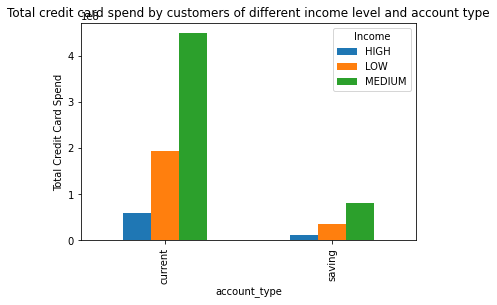

In [37]:
pd.pivot_table(data=data_1,index='account_type',columns='Income',values='cc_cons',aggfunc='sum').plot(kind='bar')
plt.title("Total credit card spend by customers of different income level and account type")
plt.ylabel("Total Credit Card Spend")

Lets check the distributions of various continuous variables and see which variables are highly skewed because they make effect the performance of regression models

In [38]:
cont_var = data_1.describe().columns

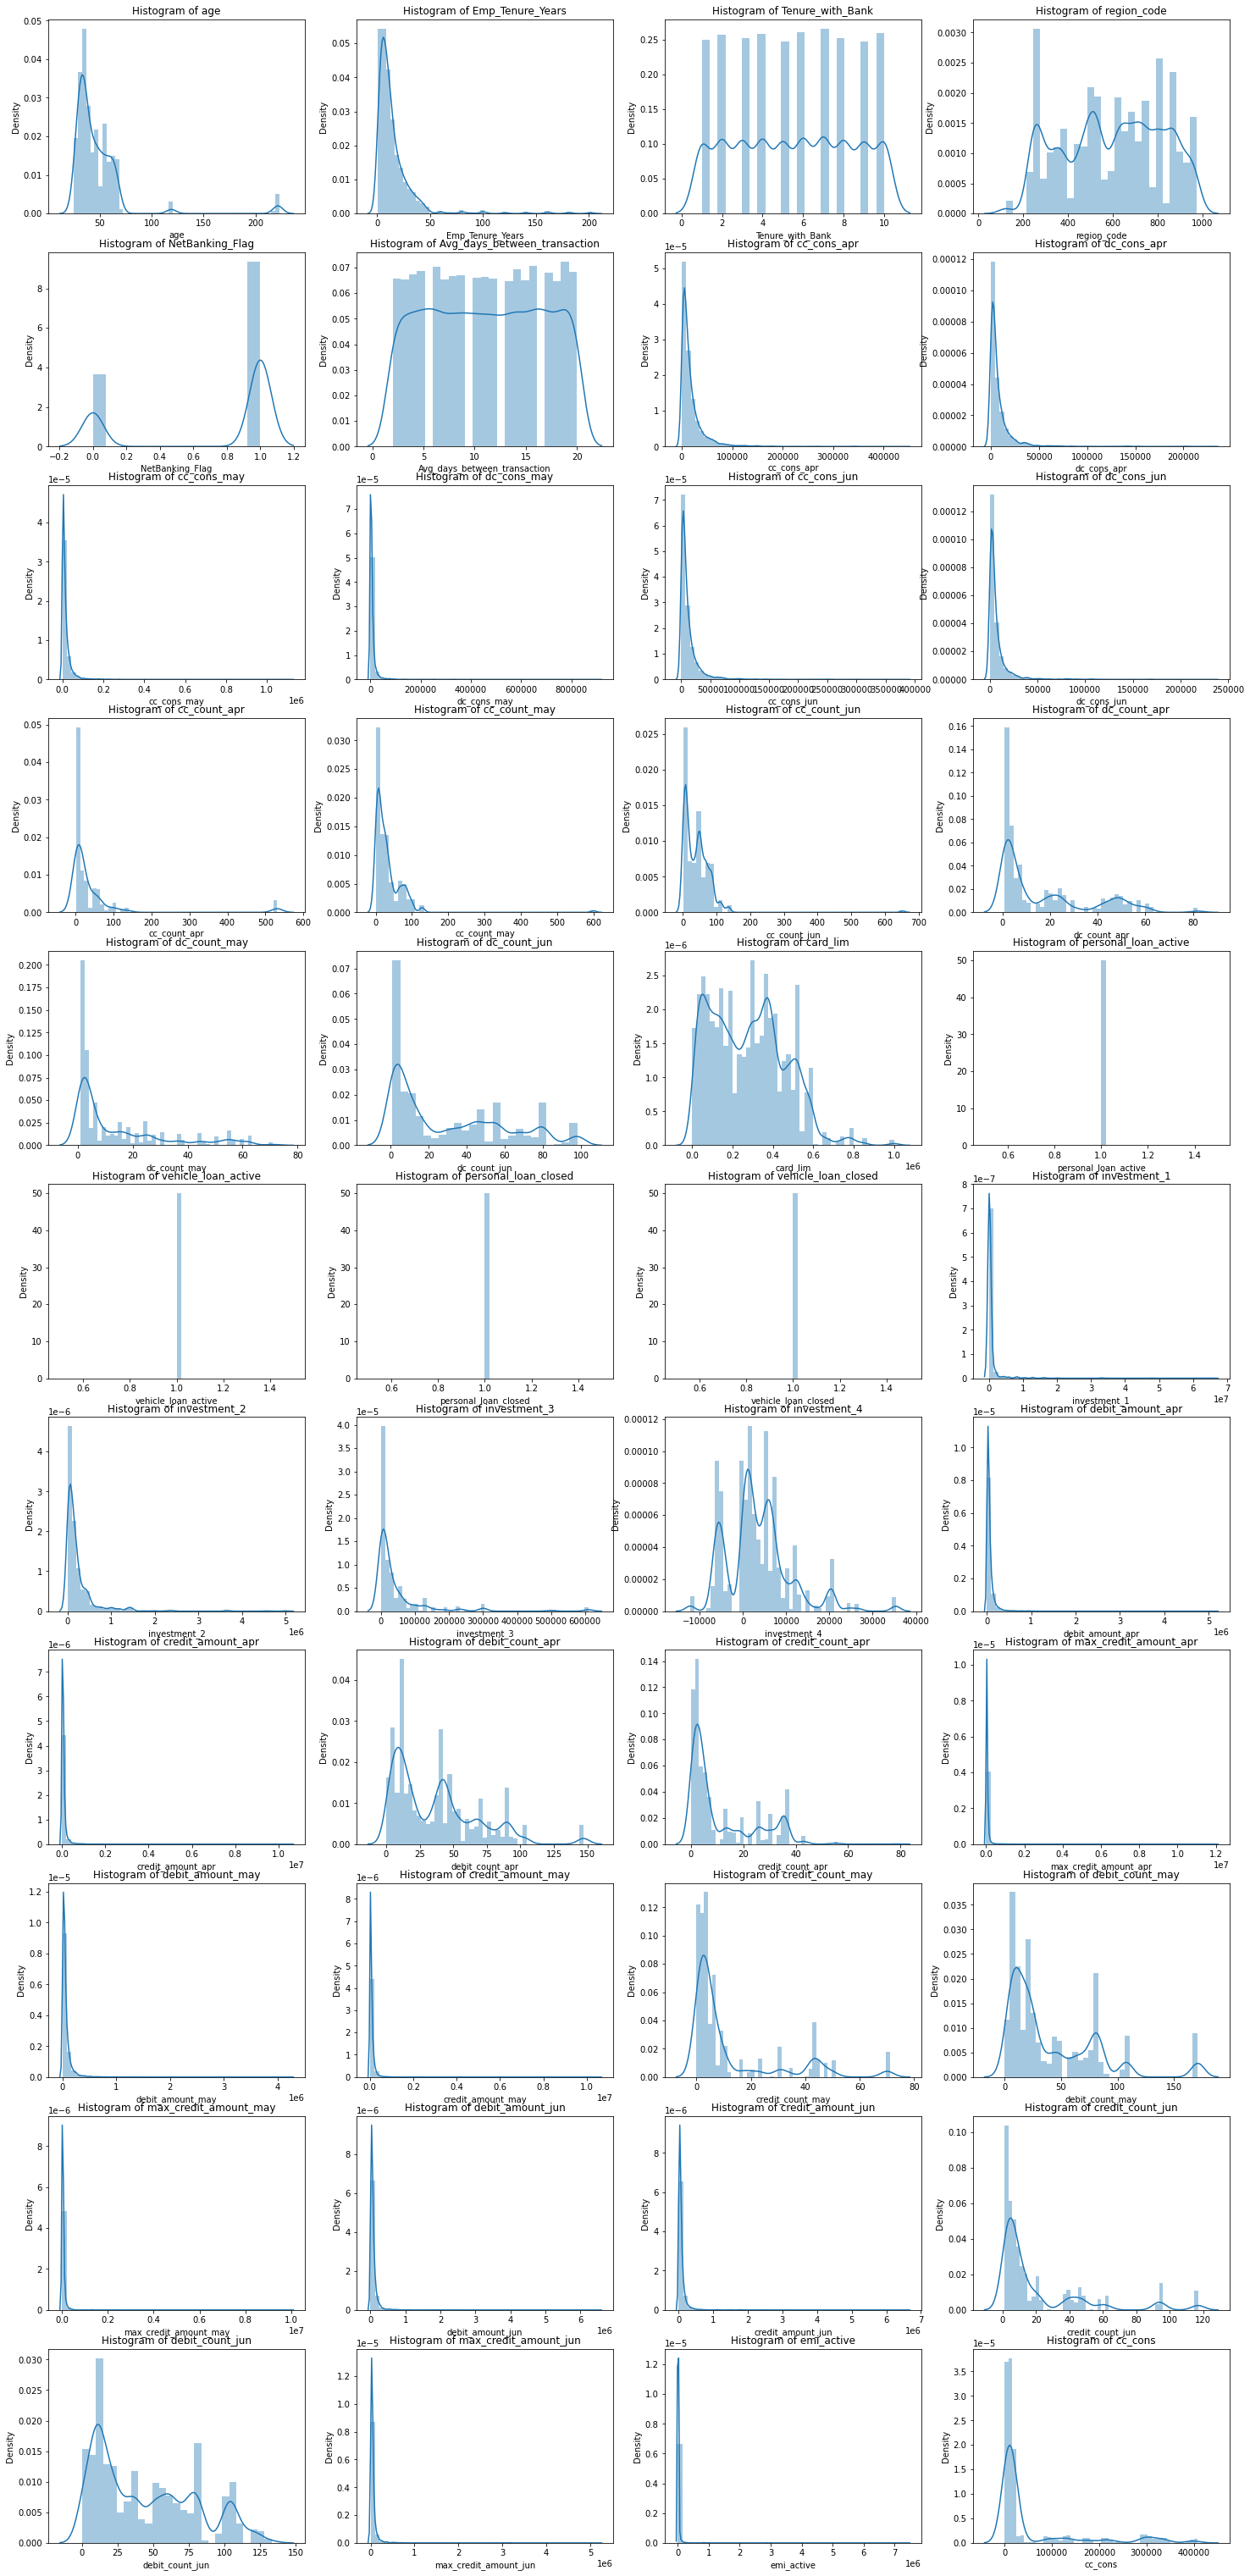

In [39]:
plt.figure(figsize=(25,70))
n = 1
for col in cont_var:
    plt.subplot(14,4,n)
    sns.distplot(data_1[col])
    plt.title("Histogram of " + col)
    n+=1
plt.show()

In [40]:
# Checking the distribution of continuous variables in our dataset
data_1.skew().sort_values(ascending=False)

max_credit_amount_apr           47.944719
max_credit_amount_may           35.917958
credit_amount_apr               32.627138
emi_active                      30.389688
dc_cons_may                     25.323356
credit_amount_may               23.388645
max_credit_amount_jun           22.340527
debit_amount_jun                19.383359
credit_amount_jun               14.858671
debit_amount_apr                13.107183
cc_cons_may                     12.055247
investment_1                    11.602058
debit_amount_may                10.296827
cc_count_may                     7.517975
cc_count_jun                     7.191501
dc_cons_apr                      7.134830
dc_cons_jun                      6.568487
cc_cons_jun                      6.108229
investment_2                     5.474625
Emp_Tenure_Years                 5.152270
cc_cons_apr                      4.838002
cc_count_apr                     4.416816
age                              4.385659
investment_3                     4

Almost all the variables are highly positive skewed including the dependent variable. We must transform these variables such that their skewness can be reduced in order to reduce skewness we can try log transformation

Let's check for outliers in data with help of boxplots

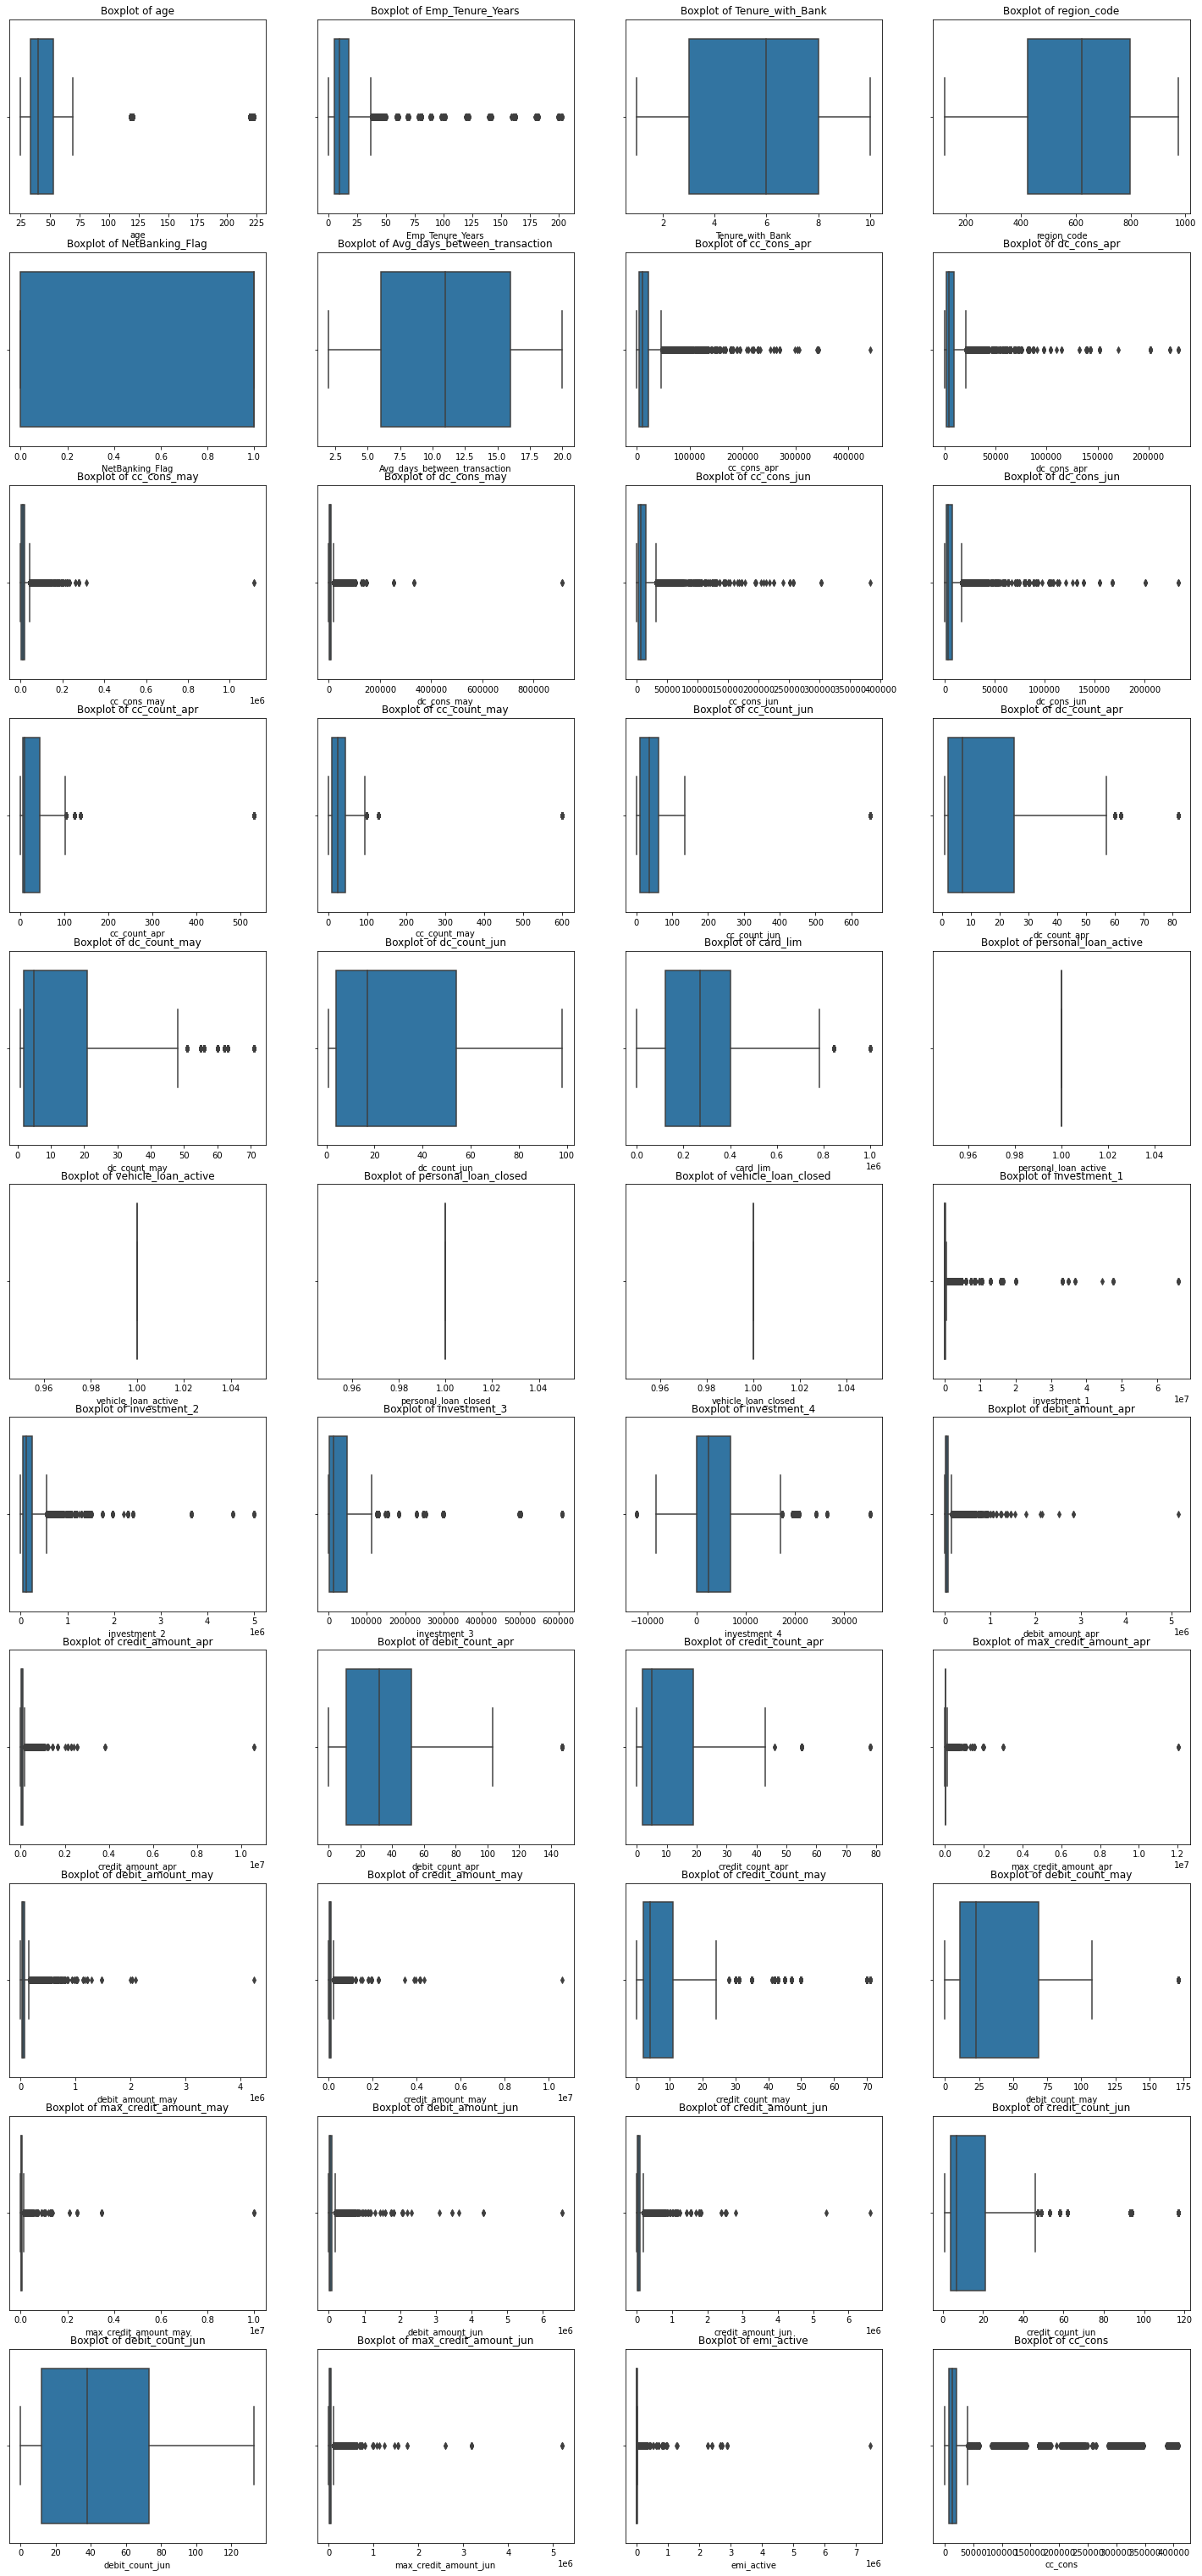

In [41]:
plt.figure(figsize=(25,70))
n = 1
for col in cont_var:
    plt.subplot(14,4,n)
    sns.boxplot(data_1[col])
    plt.title("Boxplot of " + col)
    n+=1
plt.show()

Almost all the variables are affected by outliers also. For treating the outliers without removing observations we can use clip function

Let's check distribution of continuous variables with help of scatter plots and getting best fit lines 

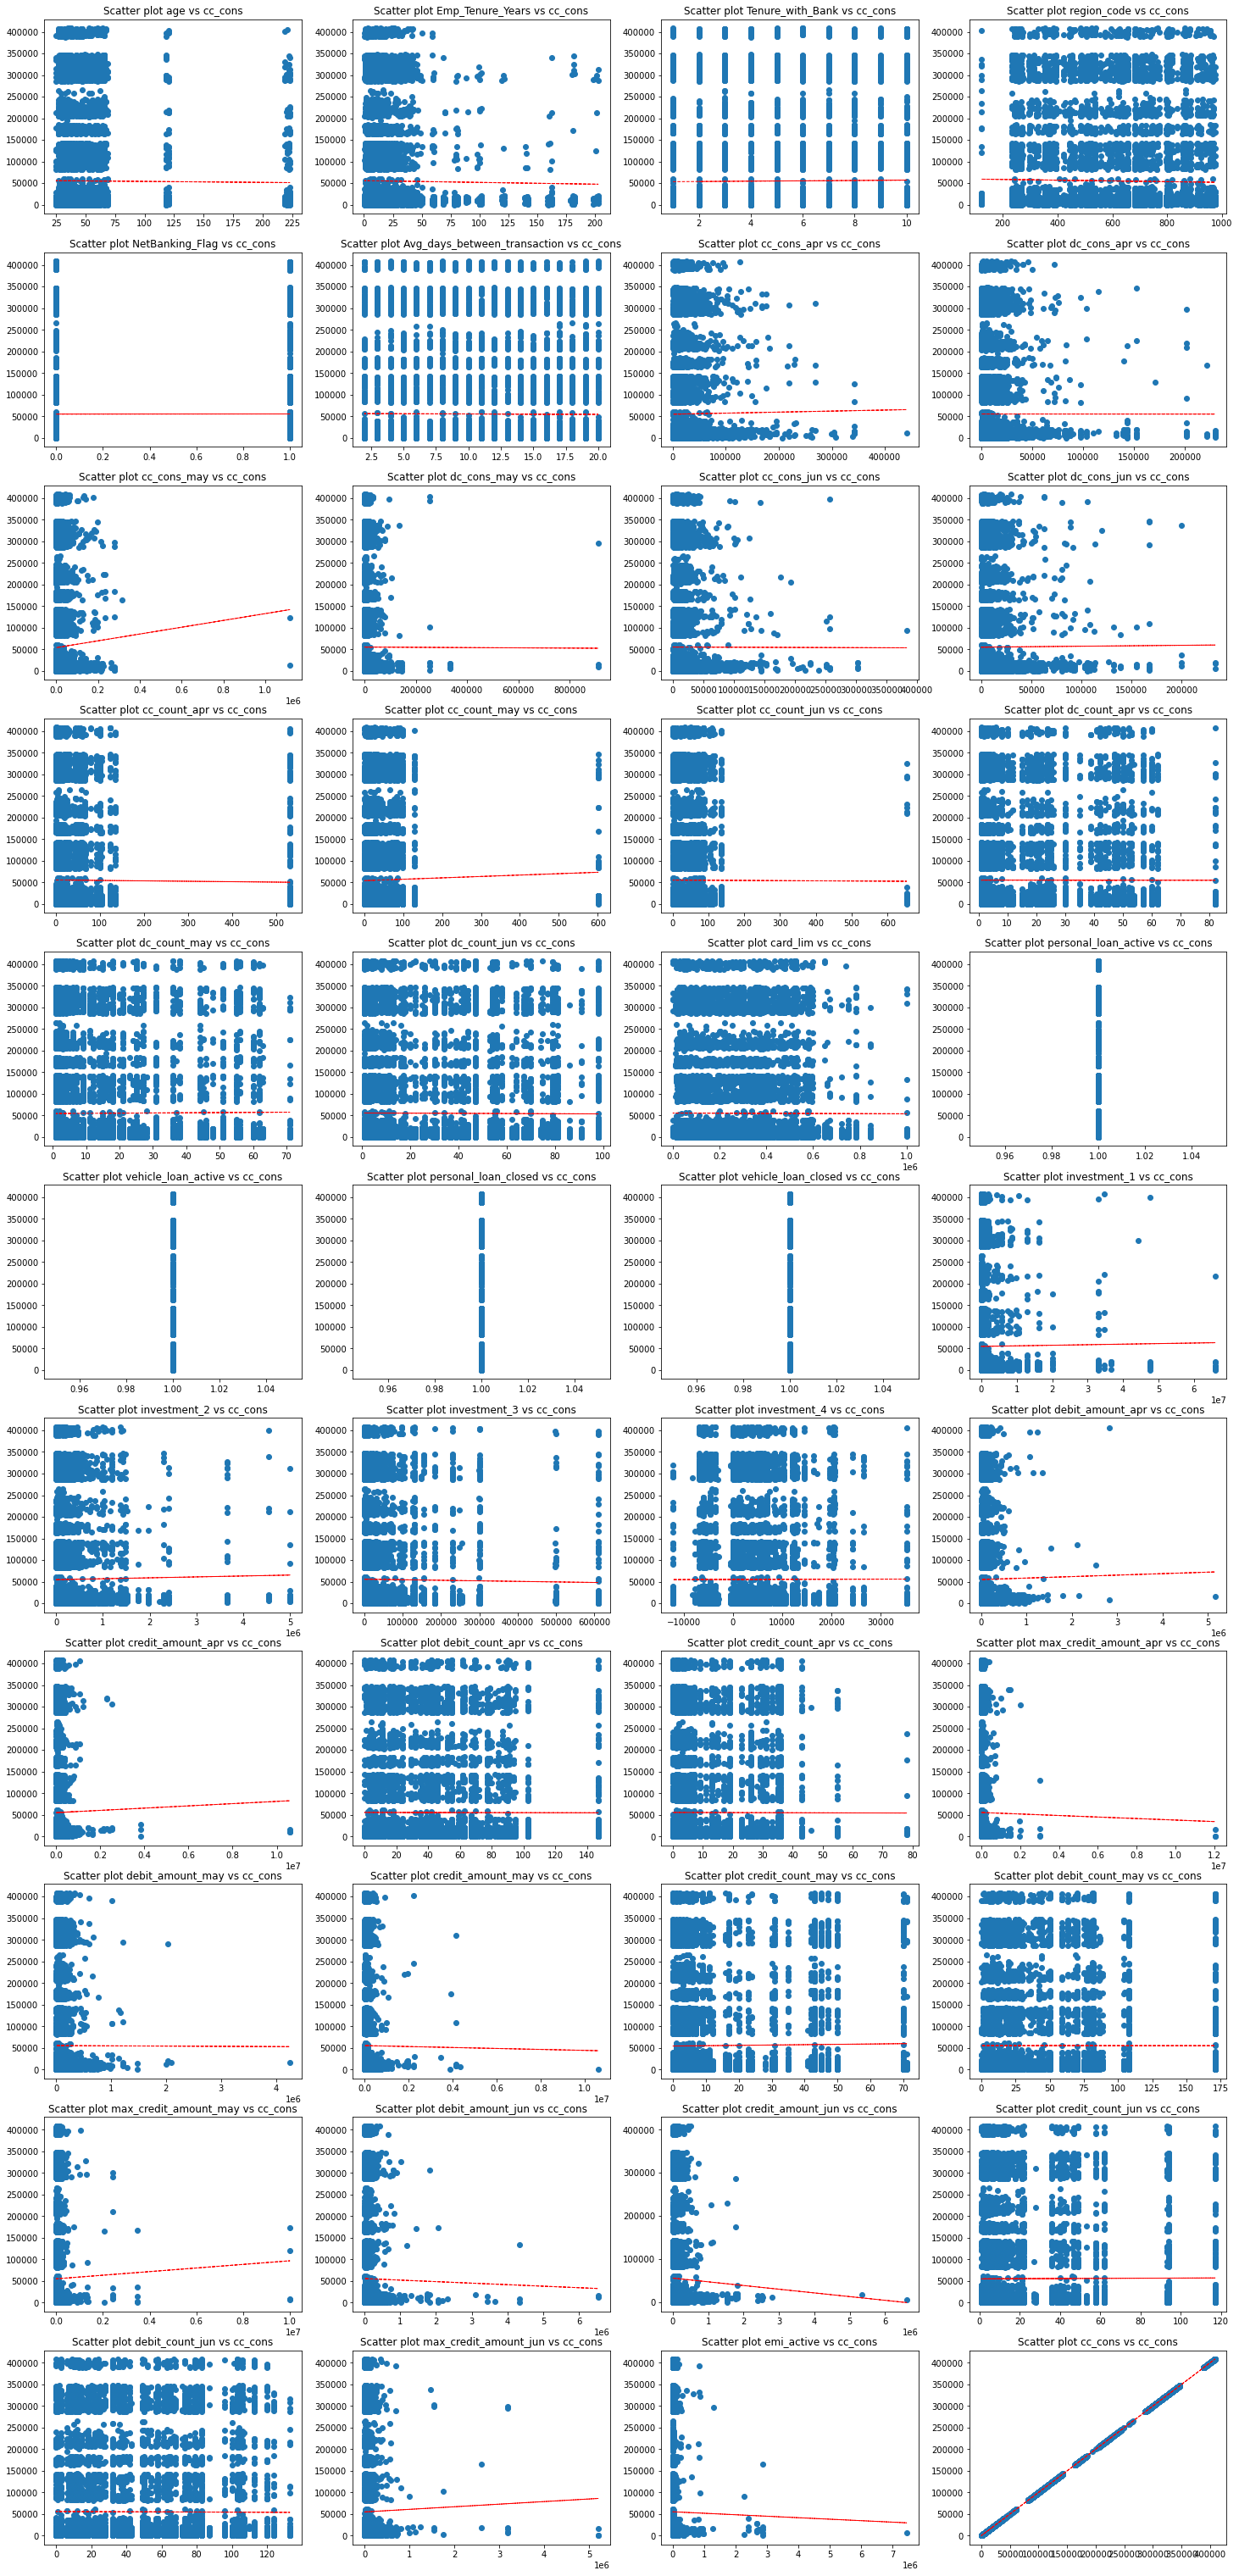

In [42]:
plt.figure(figsize=(25,70))
n=1
for col in cont_var:
    plt.subplot(14,4,n)
    feature = data_1[col]
    plt.scatter(x=feature,y=data_1['cc_cons'])
    plt.title('Scatter plot '+ col+' vs cc_cons')
    z = np.polyfit(feature,data_1['cc_cons'],1)
    y_hat = np.poly1d(z)(feature)
    plt.plot(feature,y_hat,'r--',lw=1)
    n+=1
plt.show()

From scatter plots it can be seen that out target variable is not much linearly depending on the other independent variables

Let's check the correlations between variables and visualizing them with help of heatmap

<AxesSubplot:>

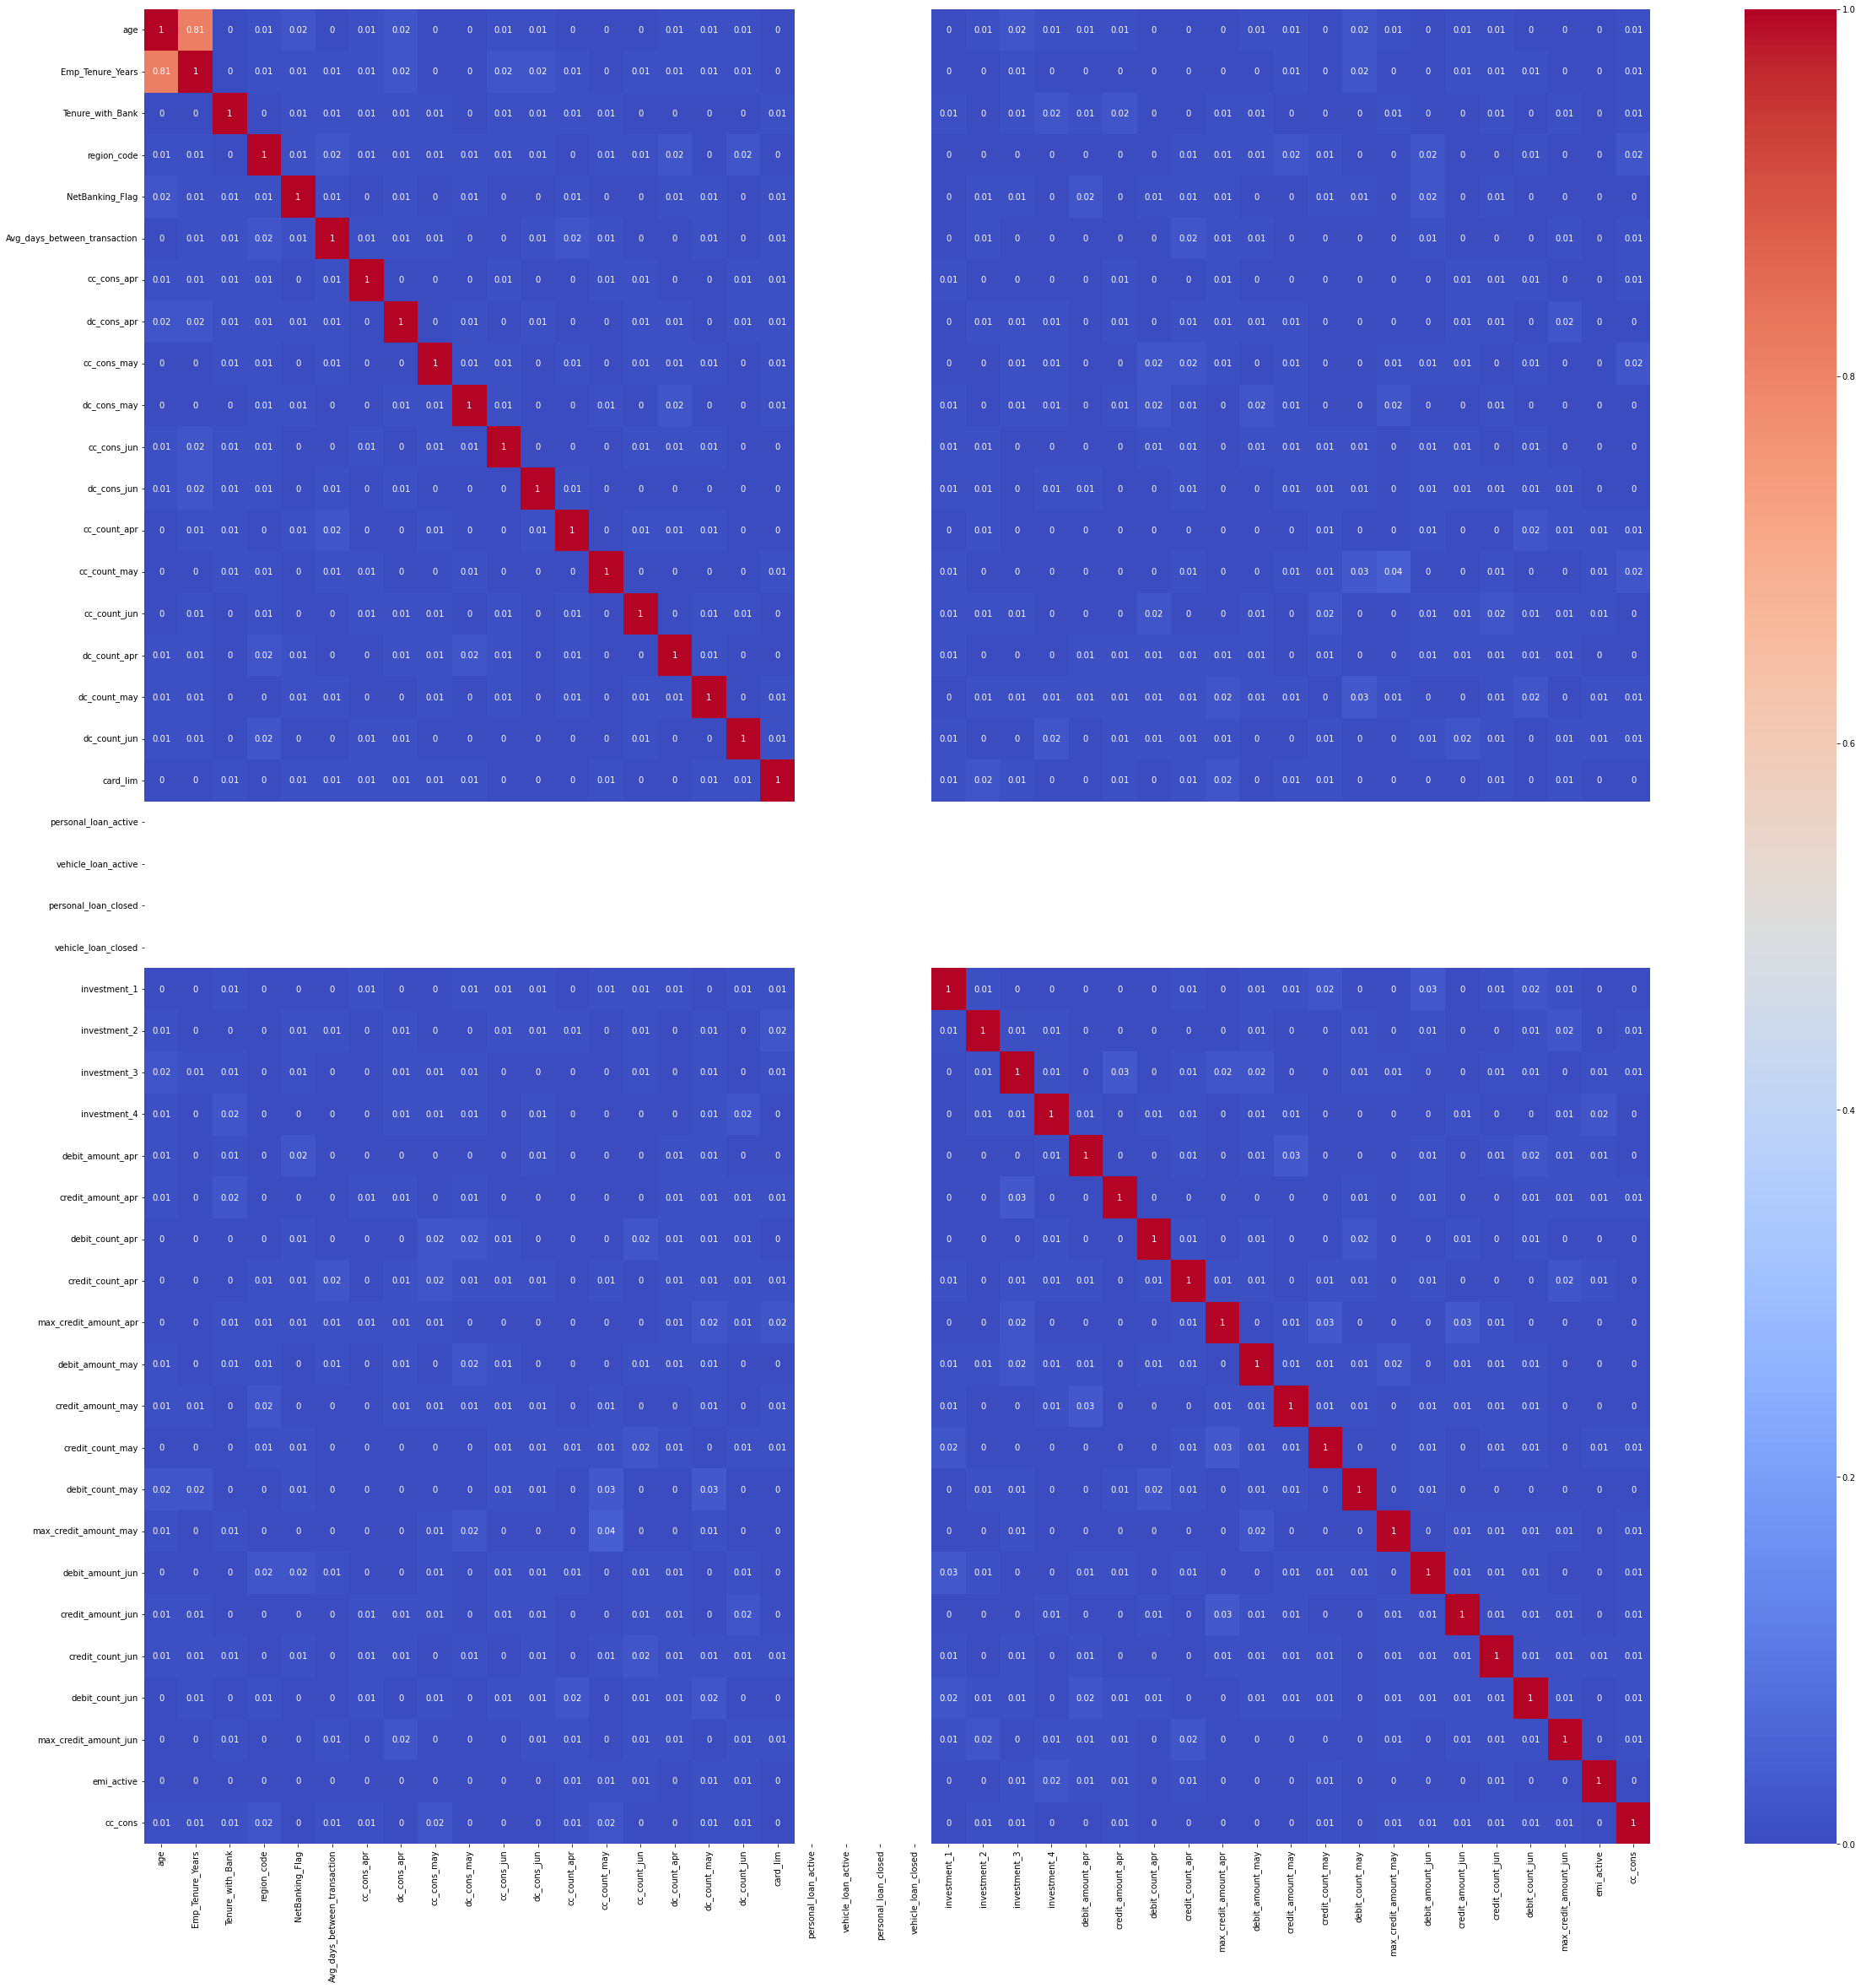

In [43]:
correlation = round(abs(data_1.corr()),2)
plt.figure(figsize=(40,40))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

It seems that variables are not correlated also except age and Emp_Tenure_Years has correlation 0f 0.81

let's check for Multicolinearity in dataset with help of vif score

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif['features'] = cont_var
vif['VIF'] = [variance_inflation_factor(data_1[data_1[cont_var].columns].values,i) for i in range(len(cont_var))]

In [46]:
vif

,features,VIF
0,age,2.918800
1,Emp_Tenure_Years,2.917156
2,Tenure_with_Bank,1.002658
3,region_code,1.003783
4,NetBanking_Flag,1.002520
5,Avg_days_between_transaction,1.002448
6,cc_cons_apr,1.001356
7,dc_cons_apr,1.002061
8,cc_cons_may,1.003003
9,dc_cons_may,1.002725


From Above Heatmap and Vif values we can say that there is no or very negligible multicolinearity in our dataset

#### Modeling Phase 1 with Original training dataset

Before training our model let's make copy of  our known dataset and apply this copy of dataframe for further calculations such that there will be no loss informations from original one

In [47]:
df_copy1 = data_1.copy()

Informations which we gain while doing EDA which will be helpful when training the model are:
- Most of the variables are highly positive skewed,so their log transformation might be needed
- There are presence of outliers in our dataset,they might be needed to handle for model better performance
- Our dependent variable seems not so much related so we might need to run OLS regression and drop the variables on basis of p values
- From vif calculations we can say that there is no multicolinearity in our dataset
- Our accuracies score will be very less because there seems to be very negligible correlation between independent and all dependent variables.



- Let's first train our models without making any changes in our original dataset

Importing libraries for training the models

In [48]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import time

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBRegressor

Encoding

In [51]:
enc = LabelEncoder()
df_copy1['Income'] = enc.fit_transform(df_copy1['Income'])

In [52]:
df_copy1 = pd.get_dummies(df_copy1,drop_first=True)

Scaling 

As our target variable are large value with so many outliers so we are doing target variable scaling also. Later we will convert it into its original form

In [53]:
cols = df_copy1.columns

In [54]:
scaler = MinMaxScaler()
df_copy1 = scaler.fit_transform(df_copy1)
df_copy1 = pd.DataFrame(df_copy1,columns=cols)

In [55]:
df_copy1.head()

,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
0,0.050505,1.0,0.071605,0.000000,0.687427,0.0,0.833333,0.055901,0.001565,0.009069,0.032531,0.042383,0.048731,0.001887,0.041667,0.013804,0.580247,0.185714,0.474227,0.430000,0.0,0.0,0.0,0.0,0.000009,0.000248,0.000533,0.401136,0.016660,0.002373,0.163265,0.076923,0.002103,0.002704,0.018088,0.028169,0.233918,0.002456,0.004594,0.001928,0.008621,0.488722,0.009776,0.000225,0.049008,0.0,1.0
1,0.050505,0.0,0.071605,0.555556,0.000000,0.0,0.666667,0.042399,0.004130,0.018365,0.000291,0.010845,0.003527,0.000000,0.010000,0.018405,0.024691,0.285714,0.309278,0.127500,0.0,0.0,0.0,0.0,0.003237,0.034535,0.147756,0.287827,0.002376,0.008368,0.238095,0.461538,0.006713,0.021693,0.006711,0.028169,0.456140,0.002395,0.006440,0.011524,0.172414,0.473684,0.004467,0.001751,0.024911,0.0,1.0
2,0.151515,1.0,0.118519,0.000000,0.797885,1.0,0.055556,0.012310,0.011799,0.001618,0.004292,0.062404,0.021884,0.079245,0.051667,0.154908,0.037037,0.000000,0.814433,0.199999,0.0,0.0,0.0,0.0,0.002515,0.093999,0.041116,0.334855,0.006630,0.008008,0.489796,0.115385,0.003198,0.004542,0.006694,0.028169,0.479532,0.001075,0.008925,0.011384,0.051724,0.007519,0.005199,0.003407,0.039412,0.0,1.0
3,0.020202,1.0,0.019753,0.555556,0.874266,1.0,0.111111,0.068598,0.005307,0.011148,0.010005,0.045595,0.058238,0.098113,0.000000,0.075153,0.000000,0.000000,0.092784,0.155000,0.0,0.0,0.0,0.0,0.001241,0.044675,0.078811,0.157812,0.002241,0.022306,0.292517,0.384615,0.004384,0.010309,0.005945,0.323944,0.222222,0.001261,0.010680,0.010390,0.172414,0.624060,0.008276,0.000476,0.018872,0.0,0.0
4,0.010101,1.0,0.021728,0.222222,0.981199,1.0,0.500000,0.004708,0.006885,0.017745,0.001124,0.030355,0.002426,0.009434,0.010000,0.088957,0.296296,0.028571,0.113402,0.150000,0.0,0.0,0.0,0.0,0.000964,0.028521,0.157654,0.158127,0.006427,0.003248,0.074830,0.025641,0.001532,0.008418,0.001846,0.605634,0.011696,0.002144,0.007995,0.030235,0.008621,0.263158,0.003324,0.000675,0.318973,0.0,1.0


Now splitting our dataset intto train and test sets

In [56]:
X = df_copy1.drop('cc_cons',axis=1)
y = df_copy1['cc_cons'].values

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

As per our problem we have to estimate our model performance on basis of Root Mean Square Percentage Error(RMSPE).
so we will define a function to calculate RMSPE

In [58]:
# For checking our model let define a function which  can calculate root mean square percentage error
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)*100)))
    if np.isnan(loss):
        return 0
    else:
        return loss

Training various models on training dataset and compare their performance on test dataset

In [59]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada_boost= AdaBoostRegressor()
grad_boost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
svm = SVR()
xgb = XGBRegressor()

def regression(X_train,X_test,y_train,y_test):
    
    model_list = [lr,lasso,ridge,elastic,dt,rf,ada_boost,grad_boost,knn,svm,xgb]

    model_name_list = []
    train_rmspe,test_rmspe = [],[]
    time_list = []


    for model in model_list:
        start = time.time()
        regressor = model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_acc,test_acc = rmspe(y_train,y_pred_train),rmspe(y_test,y_pred_test)
        time_taken = time.time() - start

        train_rmspe.append(train_acc)
        test_rmspe.append(test_acc)
        model_name_list.append(model.__class__.__name__)
        time_list.append(time_taken)


    model_df = pd.DataFrame({
        'model' : model_name_list,
        'train_rmspe' : train_rmspe,
        'test_rmspe' : test_rmspe,
        'time_taken' : time_taken
    })
    return model_df

In [60]:
%%time
regression(X_train,X_test,y_train,y_test)

CPU times: total: 2min 34s
Wall time: 2min 32s


,model,train_rmspe,test_rmspe,time_taken
0,LinearRegression,inf,1247.523775,7.18438
1,Lasso,inf,1192.998643,7.18438
2,Ridge,inf,1243.329468,7.18438
3,ElasticNet,inf,1192.998643,7.18438
4,DecisionTreeRegressor,0.0,2627.625361,7.18438
5,RandomForestRegressor,inf,1494.309469,7.18438
6,AdaBoostRegressor,inf,2226.590849,7.18438
7,GradientBoostingRegressor,inf,1287.975359,7.18438
8,KNeighborsRegressor,inf,1312.606794,7.18438
9,SVR,inf,1060.320874,7.18438


Our rmspe error for training model is very high close to infinity in all models except Decision Tree where it is zero and for testing data least values of rmspe can be seen on lasso and Support Vector Regressor

Our Decision Tree model is overfitting due to very good accuracy on training and not so good rmspe on testing data.
Let's do hperparameter tuning on DecisionTree, lasso and then Support vector Regressor and see if there is any improvments on models performance

In [61]:
from sklearn.model_selection import GridSearchCV

Hyperparameter and Cross validation on Decision Tree model

In [62]:
dt = DecisionTreeRegressor()
parameters = {'max_depth':[2,4,6,8,10],
             'min_samples_split':[2,4,6,8],
             'max_features':['auto','sqrt','log2']}

dt_grid = GridSearchCV(estimator=dt,
                      param_grid=parameters,
                      cv=2)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8]})

In [63]:
# Best Features
dt_grid.best_params_

{'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 2}

In [64]:
y_dt_tr = dt_grid.predict(X_train)
y_dt_te = dt_grid.predict(X_test)

In [65]:
print('DecisionTree train rmspe',rmspe(y_train,y_dt_tr))
print('DecisionTree test rmspe',rmspe(y_test,y_dt_te))

DecisionTree train rmspe inf
DecisionTree test rmspe 1210.80258361703


Important features

In [66]:
feature_imp = pd.Series(dt_grid.best_estimator_.feature_importances_,index=X.columns)


<AxesSubplot:>

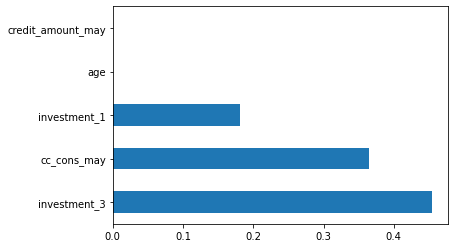

In [67]:
feature_imp.sort_values(ascending=False).iloc[:5].plot(kind='barh')

Hperparameter and cross validation on Lasso

In [68]:
lasso = Lasso()
parameters = {'alpha':[0.001,0.001,0.0015,0.01,0.015,0.1,0.5,1,2,5,10,15]}
lasso_grid = GridSearchCV(estimator=lasso,
                         param_grid=parameters,
                         cv=5)
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.0015, 0.01, 0.015, 0.1, 0.5,
                                   1, 2, 5, 10, 15]})

In [69]:
lasso_grid.best_params_

{'alpha': 0.01}

In [70]:
y_lasso_tr = lasso_grid.predict(X_train)
y_lasso_te = lasso_grid.predict(X_test)

In [71]:
print('lasso train rmspe',rmspe(y_train,y_lasso_tr))
print('lasso test rmspe',rmspe(y_test,y_lasso_te))

lasso train rmspe inf
lasso test rmspe 1192.9986425548448


Hperparameter tuning and cross validation on SVR

In [72]:
svr = SVR()
parameters = {'kernel':['rbf'],
             'C':[0.4,0.5,0.6],
             "degree":[2,3,4]}

svr_grid = GridSearchCV(estimator=svr,
                       param_grid=parameters,
                       cv=3)
svr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.4, 0.5, 0.6], 'degree': [2, 3, 4],
                         'kernel': ['rbf']})

In [73]:
svr_grid.best_params_

{'C': 0.4, 'degree': 2, 'kernel': 'rbf'}

In [74]:
y_svr_tr = svr_grid.predict(X_train)
y_svr_te = svr_grid.predict(X_test)

In [75]:
print("Svr train rmspe",rmspe(y_train,y_svr_tr))
print("Svr test rmspe",rmspe(y_test,y_svr_te))

Svr train rmspe inf
Svr test rmspe 1035.3889374409555


In Above Phase of models trainings We have trained the model with original training data without doing any transformation for skewness,Handelling outliers and features selections

#### Modelling Phase 2 with treatmant of skewness,outliers and important features selection

In [76]:
# First making copy of original dataset
df_copy2 = data_1.copy()

In [77]:
df_copy2.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.400,11432.0,2.0,26,10,48,14,47,430000,1,1,1.0,1,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,287.00,4217.000,885.0,1.0,7,13,3,21,31,127500,1,1,1.0,1,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.250,5168.0,43.0,32,102,4,1,80,199999,1,1,1.0,1,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.000,13650.3,53.0,1,50,1,1,10,155000,1,1,1.0,1,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
19106,current,M,27,MEDIUM,4.9,3,958.0,1,11.0,2328.22,1597.54,19979.75,1045.85,11686.255,628.0,6.0,7,59,25,3,12,150000,1,1,1.0,1,63590.40,142608.50,96558.0,-4664.0,33149.03,34463.00,11.0,2,18433.0,35826.70,19584.00,43,2,21440.0,52292.68,199925.5,2,35,17284.0,Y,5026.50,130263.0


In [78]:
# Getting dataframe of only continuous variables
df_cont_var = df_copy2[df_copy2.describe().columns]

##### Outlier's Handelling

In [79]:
# Defining a function which will cap outliers within 95 percentile
def outliers_capping(x):
    x = np.clip(a=x,a_min=x.quantile(0.5),a_max=x.quantile(0.90))
    return x

In [80]:
df_cont_var = df_cont_var.apply(lambda x: outliers_capping(x))

##### Log Transformation for positive skewness handling

In [81]:
# function for log transformation
def skewness_handling(x):
    x = np.log1p(x)
    return x

In [82]:
df_cont_var = df_cont_var.apply(lambda x: skewness_handling(x))

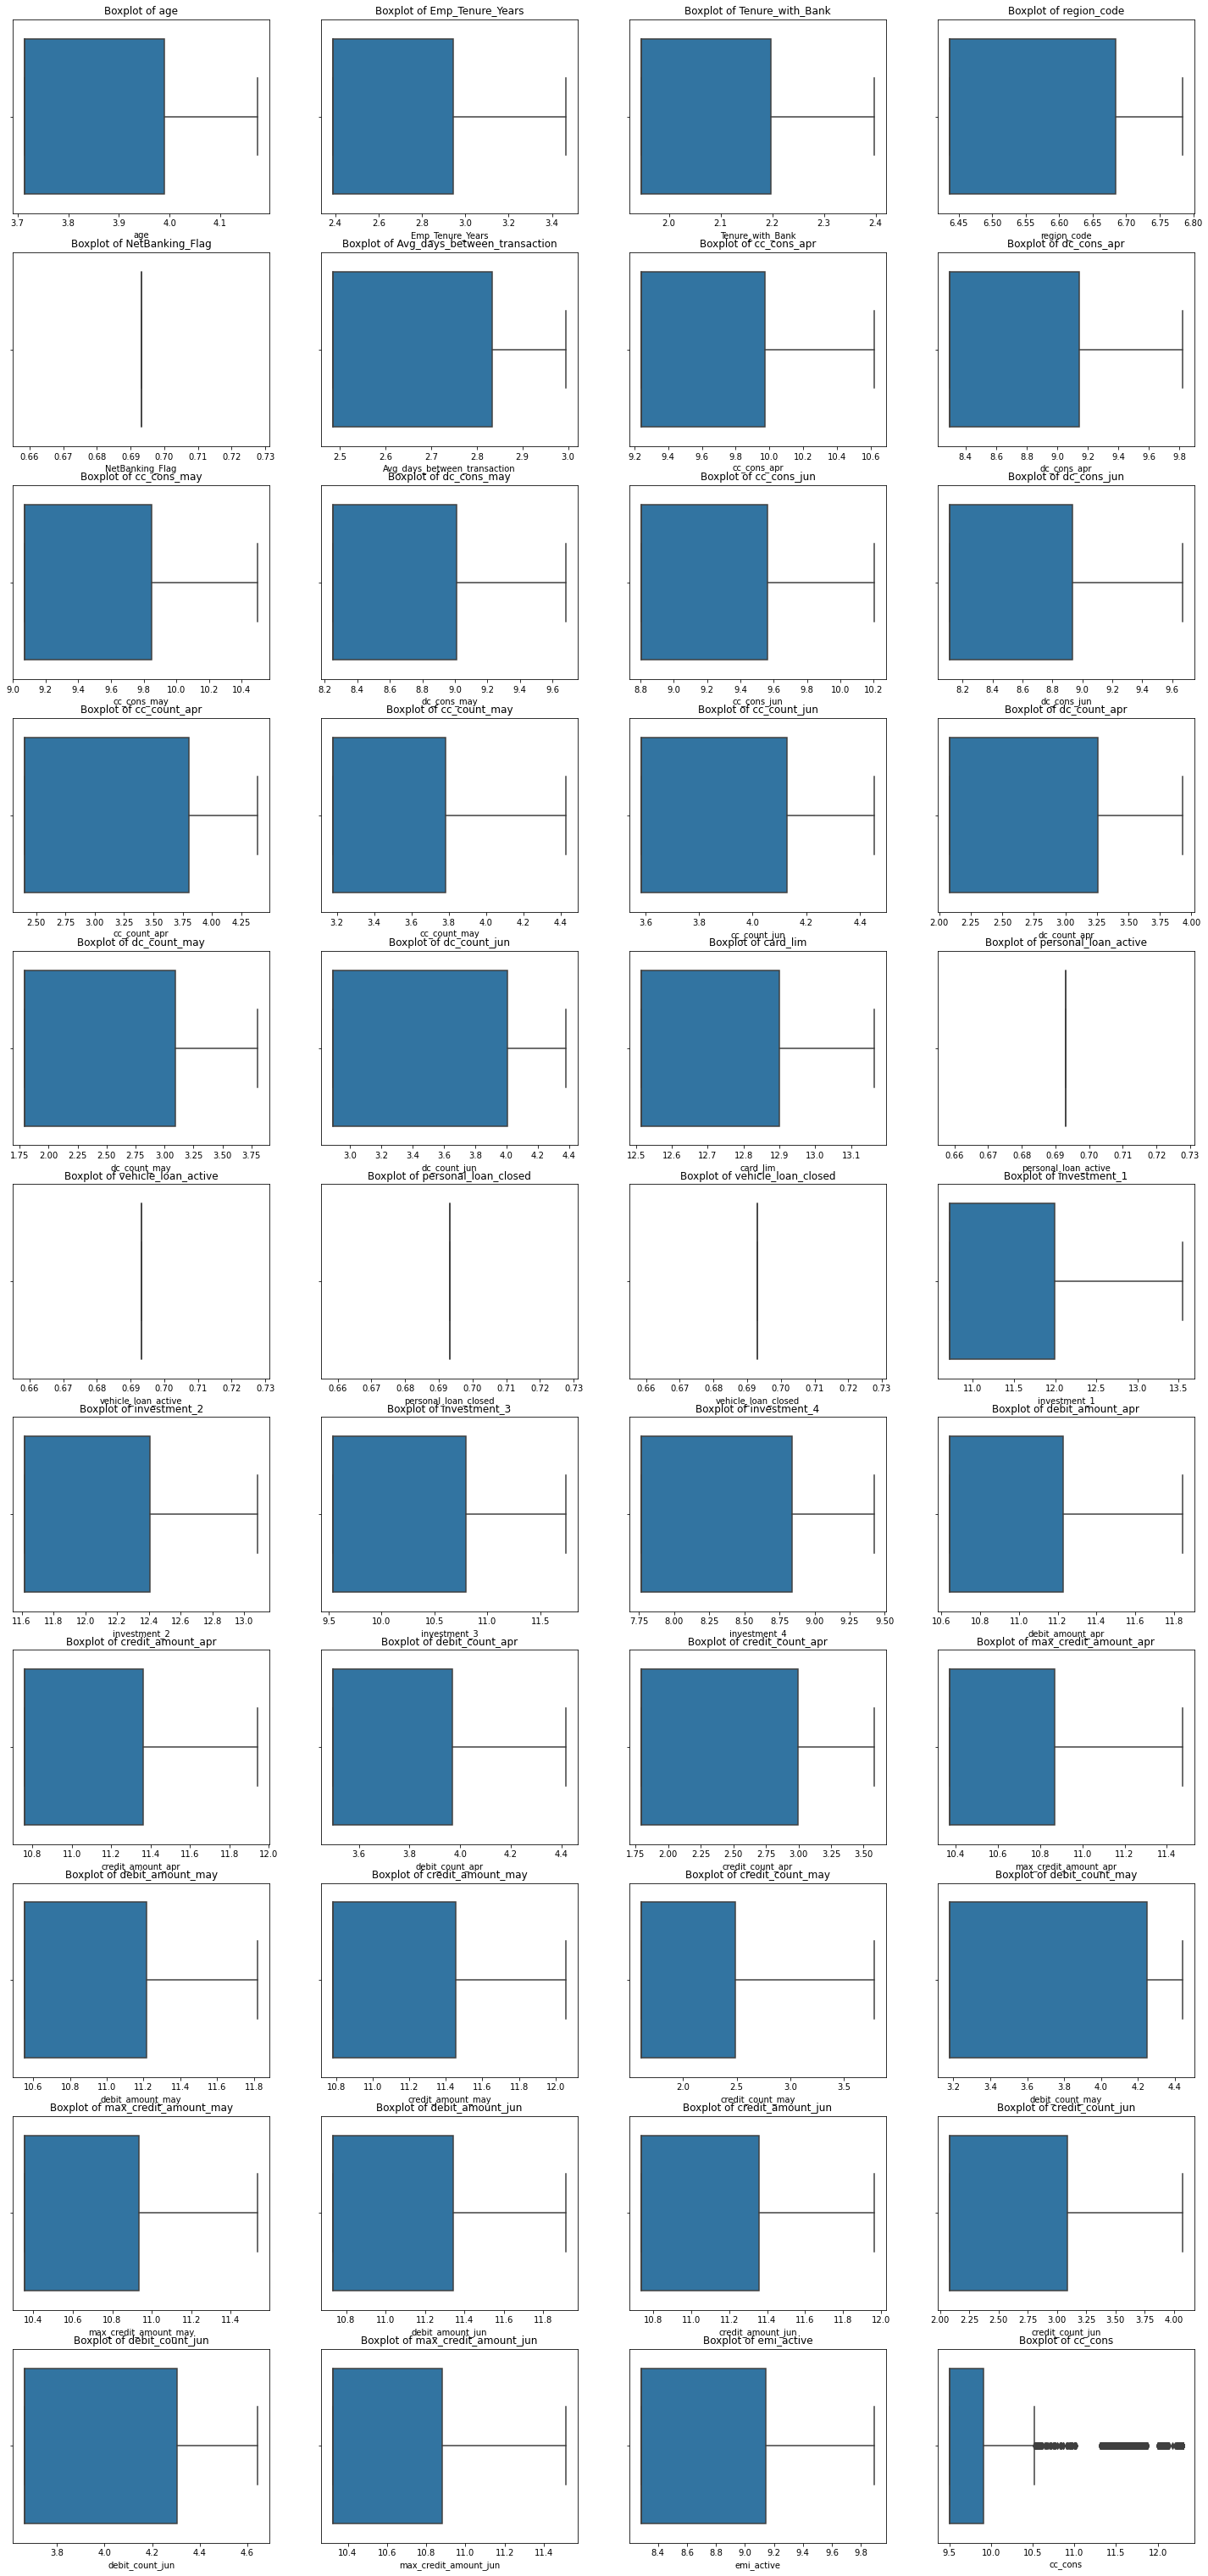

In [83]:
plt.figure(figsize=(25,70))
n = 1
for col in df_cont_var.columns:
    plt.subplot(14,4,n)
    sns.boxplot(df_cont_var[col])
    plt.title("Boxplot of " + col)
    n+=1
plt.show()

From boxplots we can see that our target variable is suffering from outliers after log transformation so we will replace these outliers with target variable mean

In [84]:
mean_cc_cons = df_cont_var['cc_cons'].mean()

In [85]:
df_cont_var['cc_cons'] = df_cont_var['cc_cons'].apply(lambda x : mean_cc_cons  if x>10.5 else x)

In [86]:
# Now detting our transformed dataframe
df_cat = df_copy2[['account_type','gender','Income','loan_enq']]
df_transformed = df_cont_var.merge(df_cat,how='inner',on='ID')

In [87]:
df_transformed.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,Income,loan_enq
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,3.713572,2.772589,1.94591,6.563856,0.693147,2.890372,10.122382,8.292999,9.238831,9.685267,9.698454,9.344259,2.397895,3.295837,3.583519,3.891820,2.708050,3.871201,12.971543,0.693147,0.693147,0.693147,0.693147,10.715240,11.617294,9.537772,8.837246,11.361177,10.759986,3.496508,1.945910,10.370831,10.551344,12.058561,1.609438,3.713572,10.35485,10.732094,10.734264,2.079442,4.189655,10.836380,8.282630,9.904237,current,M,MEDIUM,Y
17645,3.713572,2.772589,1.94591,6.436150,0.693147,2.708050,9.849170,8.292999,9.936584,8.248529,8.803312,8.110127,2.397895,3.178054,3.583519,2.079442,3.091042,3.465736,12.513561,0.693147,0.693147,0.693147,0.693147,12.271664,12.059193,11.413392,7.763021,10.642482,11.392952,3.583519,3.583519,11.299126,11.432556,11.172728,1.609438,4.369448,10.35485,10.732094,11.241209,3.091042,4.158883,10.323053,9.476110,9.500320,current,M,HIGH,Y
7604,4.025352,3.238678,1.94591,6.688355,0.693147,2.484907,9.238840,8.292999,9.070503,8.277440,10.084026,8.550435,3.784190,3.496508,4.454347,2.079442,1.791759,4.382027,12.513561,0.693147,0.693147,0.693147,0.693147,12.019192,13.060490,10.147414,8.225771,10.642482,11.349006,4.290459,2.302585,10.557556,10.551344,11.170139,1.609438,4.418841,10.35485,10.974630,11.229023,2.079442,3.663562,10.323053,9.893711,9.686326,current,M,MEDIUM,Y
1590,3.713572,2.388763,1.94591,6.766192,0.693147,2.484907,10.325170,8.292999,9.442315,9.120322,9.771213,9.521590,3.988984,3.178054,3.931826,2.079442,1.791759,2.890372,12.513561,0.693147,0.693147,0.693147,0.693147,11.312932,12.316631,10.789340,7.763021,10.642482,11.945172,3.784190,3.433987,10.872997,10.688961,11.051443,3.178054,3.663562,10.35485,11.154141,11.137635,3.091042,4.430817,10.669839,8.282630,9.500320,current,F,MEDIUM,Y
19106,3.713572,2.388763,1.94591,6.784457,0.693147,2.484907,9.238840,8.292999,9.902525,8.248529,9.366254,8.110127,2.397895,3.178054,4.094345,3.258097,1.791759,2.890372,12.513561,0.693147,0.693147,0.693147,0.693147,11.060234,11.867865,11.477909,7.763021,10.642482,10.759986,3.496508,1.791759,10.370831,10.551344,10.781889,3.784190,3.178054,10.35485,10.864631,11.966934,2.079442,3.663562,10.323053,8.522678,10.109784,current,M,MEDIUM,Y


Encoding

In [88]:
df_transformed['Income'] = enc.fit_transform(df_transformed['Income'])

In [89]:
df_transformed = pd.get_dummies(df_transformed,drop_first=True)

In [90]:
df_transformed.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,Income,account_type_saving,gender_M
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,3.713572,2.772589,1.94591,6.563856,0.693147,2.890372,10.122382,8.292999,9.238831,9.685267,9.698454,9.344259,2.397895,3.295837,3.583519,3.891820,2.708050,3.871201,12.971543,0.693147,0.693147,0.693147,0.693147,10.715240,11.617294,9.537772,8.837246,11.361177,10.759986,3.496508,1.945910,10.370831,10.551344,12.058561,1.609438,3.713572,10.35485,10.732094,10.734264,2.079442,4.189655,10.836380,8.282630,9.904237,2,0,1
17645,3.713572,2.772589,1.94591,6.436150,0.693147,2.708050,9.849170,8.292999,9.936584,8.248529,8.803312,8.110127,2.397895,3.178054,3.583519,2.079442,3.091042,3.465736,12.513561,0.693147,0.693147,0.693147,0.693147,12.271664,12.059193,11.413392,7.763021,10.642482,11.392952,3.583519,3.583519,11.299126,11.432556,11.172728,1.609438,4.369448,10.35485,10.732094,11.241209,3.091042,4.158883,10.323053,9.476110,9.500320,0,0,1
7604,4.025352,3.238678,1.94591,6.688355,0.693147,2.484907,9.238840,8.292999,9.070503,8.277440,10.084026,8.550435,3.784190,3.496508,4.454347,2.079442,1.791759,4.382027,12.513561,0.693147,0.693147,0.693147,0.693147,12.019192,13.060490,10.147414,8.225771,10.642482,11.349006,4.290459,2.302585,10.557556,10.551344,11.170139,1.609438,4.418841,10.35485,10.974630,11.229023,2.079442,3.663562,10.323053,9.893711,9.686326,2,0,1
1590,3.713572,2.388763,1.94591,6.766192,0.693147,2.484907,10.325170,8.292999,9.442315,9.120322,9.771213,9.521590,3.988984,3.178054,3.931826,2.079442,1.791759,2.890372,12.513561,0.693147,0.693147,0.693147,0.693147,11.312932,12.316631,10.789340,7.763021,10.642482,11.945172,3.784190,3.433987,10.872997,10.688961,11.051443,3.178054,3.663562,10.35485,11.154141,11.137635,3.091042,4.430817,10.669839,8.282630,9.500320,2,0,0
19106,3.713572,2.388763,1.94591,6.784457,0.693147,2.484907,9.238840,8.292999,9.902525,8.248529,9.366254,8.110127,2.397895,3.178054,4.094345,3.258097,1.791759,2.890372,12.513561,0.693147,0.693147,0.693147,0.693147,11.060234,11.867865,11.477909,7.763021,10.642482,10.759986,3.496508,1.791759,10.370831,10.551344,10.781889,3.784190,3.178054,10.35485,10.864631,11.966934,2.079442,3.663562,10.323053,8.522678,10.109784,2,0,1


Scaling

In [91]:
cols = df_transformed.columns

In [92]:
df_transformed = scaler.fit_transform(df_transformed)
df_transformed = pd.DataFrame(df_transformed,columns=cols)

In [93]:
# Spliting the data in test and train set
X1 = df_transformed.drop('cc_cons',axis=1)
y1 = df_transformed['cc_cons'].values

In [94]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.33,random_state=42)

In [95]:
# Comparing all models
regression(X1_train,X1_test,y1_train,y1_test)

,model,train_rmspe,test_rmspe,time_taken
0,LinearRegression,inf,inf,5.531322
1,Lasso,inf,inf,5.531322
2,Ridge,inf,inf,5.531322
3,ElasticNet,inf,inf,5.531322
4,DecisionTreeRegressor,0.0,0.0,5.531322
5,RandomForestRegressor,inf,inf,5.531322
6,AdaBoostRegressor,inf,inf,5.531322
7,GradientBoostingRegressor,inf,inf,5.531322
8,KNeighborsRegressor,0.0,0.0,5.531322
9,SVR,inf,inf,5.531322


- Root Mean Square Percentage error for Decision Tree Regressor and KNeighbors Regressor is zero for both train and test
- We can use any of these two models to calculate credit card consumption average for data which target variable.


Applying all the steps of modelling on dataset of unknown target variable 

In [96]:
data_0.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [97]:
df_unknown = data_0.copy()

In [98]:
df_unknown.drop('cc_cons',axis=1,inplace=True)

In [99]:
df_unknown.dropna(inplace=True)

In [100]:
df_unknown_cont = df_unknown[df_unknown.describe().columns]

In [101]:
# Outliers handelling
df_unknown_cont = df_unknown_cont.apply(lambda x: outliers_capping(x))

In [102]:
# Skewness handling
df_unknown_cont = df_unknown_cont.apply(lambda x : skewness_handling(x))

In [103]:
df_unknown_cat = df_unknown[['account_type','gender','Income','loan_enq']]
df_new = df_unknown_cont.merge(df_unknown_cat,how='inner',on='ID')

In [104]:
# Encoding
df_new['Income'] = enc.fit_transform(df_new['Income'])
df_new = pd.get_dummies(df_new,drop_first=True)

In [105]:
# Scaling
cols = df_new.columns
X = scaler.fit_transform(df_new)
X = pd.DataFrame(X,columns=cols)

In [106]:
# Now our transformed data is ready
X.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,Income,account_type_saving,gender_M
0,0.968066,0.941333,1.000000,0.022913,0.0,0.000000,0.000000,0.000000,0.088024,0.000000,0.023194,0.000000,0.000000,0.000000,0.000000,0.967272,0.000000,0.340535,0.984525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.788196,0.649340,0.528277,0.0,0.772495,0.000000,0.381267,0.825825,0.197969,0.083836,0.000000,0.000000,0.000000,1.000000,0.891710,0.932577,0.358643,0.000000,1.0,0.0,1.0
1,0.000000,0.310297,1.000000,0.147955,0.0,0.174183,0.358872,0.000000,0.000000,0.403363,0.431872,0.458918,0.328191,0.254201,0.000000,0.000000,0.909136,0.000000,0.572230,0.0,0.0,0.0,0.0,1.000000,0.312653,0.313659,0.000000,0.588611,1.0,0.000000,0.000000,0.003506,0.000000,0.000000,0.000000,0.775606,0.740662,0.567346,1.000000,0.000000,0.000000,0.000000,0.217025,1.0,0.0,1.0
2,0.000000,0.000000,1.000000,0.000000,0.0,0.335451,0.773936,1.000000,0.000000,1.000000,0.000000,0.086643,0.091707,0.204295,0.259731,0.570105,0.444271,0.482160,0.000000,0.0,0.0,0.0,0.0,0.178122,0.444317,0.000000,0.000000,0.067901,0.0,0.636354,0.971046,1.000000,1.000000,0.032901,0.154718,0.981171,0.000000,0.615057,0.000000,0.411317,0.145415,0.264365,0.387910,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.200709,0.000000,0.790153,0.132950,0.000000,0.450689,1.000000,0.334852,0.000000,0.000000,0.000000,0.089070,0.0,0.0,0.0,0.0,0.309144,0.000000,0.000000,0.000000,0.000000,1.0,0.097173,0.238087,1.000000,0.096782,0.000000,0.000000,0.942113,0.000000,0.000000,0.503860,0.000000,0.000000,0.057108,0.000000,1.0,0.0,1.0
4,0.000000,0.158187,0.474617,0.531874,0.0,1.000000,0.200731,0.383893,0.572682,1.000000,0.000000,0.258277,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.485635,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.901819,0.298683,0.0,0.834305,0.000000,0.540554,1.000000,0.000000,0.000000,1.000000,0.219434,0.496678,0.473493,0.552009,0.000000,0.000000,0.000000,0.0,0.0,1.0


In [107]:
dt = DecisionTreeRegressor()
dt.fit(X1_train,y1_train)

DecisionTreeRegressor()

- At Last Predicting The  average of credit card consumption for the next three months

In [108]:
cc_consumption = dt.predict(X)

In [109]:
cc_consumption

array([0.12853537, 0.6778174 , 0.32499884, ..., 0.        , 0.12484144,
       0.27701312])

This cc_consumption is in scalled format we need to convert it in original scale

In [110]:
max_cc = data_1['cc_cons'].max()
min_cc = data_1['cc_cons'].min()
range_ = max_cc - min_cc

In [111]:
cc_consumption = max_cc - (range_*cc_consumption)

In [112]:
cc_consumption

array([355890.4666264 , 131573.57362632, 275658.32205099, ...,
       408382.        , 357399.00191643, 295254.8285606 ])

In [113]:
print("The maximum value of our target variable is ",cc_consumption.max())

The maximum value of our target variable is  408382.0


In [114]:
print("The minimum value of our target variable is ",cc_consumption.min())

The minimum value of our target variable is  743.4160074895481


In [115]:
print("The mean value of our target variable is ", cc_consumption.mean())

The mean value of our target variable is  314625.4995354621


Text(0.5, 1.0, 'Distribution of our target variable')

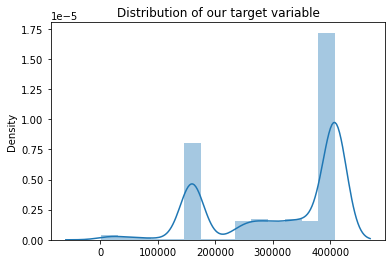

In [116]:
# Disribution of our predicted target variable is
sns.distplot(cc_consumption)
plt.title("Distribution of our target variable")